In [ ]:
#1.	Data preparation

# import pandas
import pandas as pd

# import numpy
import numpy as np

# read data file
df = pd.read_csv("DM8_SMSSpamCollection.csv", names=["label", "message"])

In [ ]:
sample_df = df.sample(frac=0.85, replace=False, random_state=22)

In [ ]:
sample_df.head

<bound method NDFrame.head of      label                                            message
803   spam  FREE for 1st week! No1 Nokia tone 4 ur mobile ...
3531   ham  Tyler (getting an 8th) has to leave not long a...
4804   ham                     How do you plan to manage that
876   spam  Shop till u Drop, IS IT YOU, either 10K, 5K, Â...
4887   ham                             Or just do that 6times
...    ...                                                ...
483    ham                                 Watching tv lor...
3238   ham  Ron say fri leh. N he said ding tai feng cant ...
208    ham                       Aight yo, dats straight dogg
2736   ham                      I meant middle left or right?
5339   ham            My birthday is on feb  &lt;#&gt;  da. .

[4738 rows x 2 columns]>

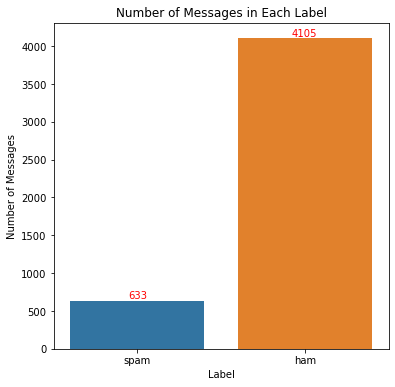

In [ ]:
# import libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
sns.countplot(x="label", data=sample_df)
plt.title("Number of Messages in Each Label")
plt.xlabel("Label")
plt.ylabel("Number of Messages")
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()),
            color='red', ha='center', va='bottom')
plt.show()

In [ ]:
print(sample_df['label'].value_counts())
print(sample_df['label'].value_counts(normalize=True))

ham     4105
spam     633
Name: label, dtype: int64
ham     0.866399
spam    0.133601
Name: label, dtype: float64


In [ ]:
#2.	Introductory Text Mining Analysis

sample_df["message"] = sample_df.message.str.replace("[^\w\s]", "")

print (sample_df["message"])

803     FREE for 1st week No1 Nokia tone 4 ur mobile e...
3531    Tyler getting an 8th has to leave not long aft...
4804                       How do you plan to manage that
876     Shop till u Drop IS IT YOU either 10K 5K Â500 ...
4887                               Or just do that 6times
                              ...                        
483                                       Watching tv lor
3238    Ron say fri leh N he said ding tai feng cant m...
208                           Aight yo dats straight dogg
2736                         I meant middle left or right
5339                     My birthday is on feb  ltgt  da 
Name: message, Length: 4738, dtype: object


C:\Users\ayuda\AppData\Local\Temp\ipykernel_24616\724883270.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  sample_df["message"] = sample_df.message.str.replace("[^\w\s]", "")


In [ ]:
sample_df['word_count'] = sample_df.message.str.split().str.len()

avg_word = sample_df.groupby('label')['word_count'].mean()
print(avg_word)

label
ham     14.070889
spam    23.557662
Name: word_count, dtype: float64


C:\Users\ayuda\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ayuda\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


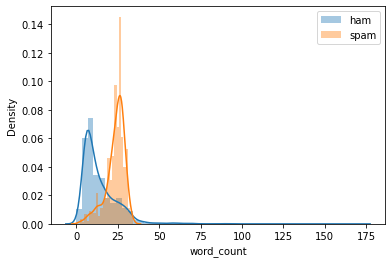

In [ ]:
import seaborn as sns

sns.distplot(sample_df[sample_df['label']=='ham']['word_count'], label='ham')
sns.distplot(sample_df[sample_df['label']=='spam']['word_count'], label='spam')

# show legend
plt.legend()

# show the chart
plt.show()

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
text = "\n".join(sample_df['message'][:10].str.lower())

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ayuda\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
tokenized_sent = sent_tokenize(text)
print(tokenized_sent)

['free for 1st week no1 nokia tone 4 ur mobile every week just txt nokia to 8077 get txting and tell ur mates wwwgetzedcouk pobox 36504 w45wq 16 norm150ptone\ntyler getting an 8th has to leave not long after 9 can you get here in like an hour\nhow do you plan to manage that\nshop till u drop is it you either 10k 5k â500 cash or â100 travel voucher call now 09064011000 ntt po box cr01327bt fixedline cost 150ppm mobile vary\nor just do that 6times\ni was about to do it when i texted i finished a long time ago and showered and erything\no ic lol should play 9 doors sometime yo\nfree entry to the gr8prizes wkly comp 4 a chance to win the latest nokia 8800 psp or â250 cash every wktxt great to 80878 httpwwwgr8prizescom 08715705022\ntell dear what happen to you why you talking to me like an alian\nthank you baby i cant wait to taste the real thing']


In [ ]:
#2.5

from nltk.tokenize import word_tokenize

tokenized_word = word_tokenize(text)
print(tokenized_word)

['free', 'for', '1st', 'week', 'no1', 'nokia', 'tone', '4', 'ur', 'mobile', 'every', 'week', 'just', 'txt', 'nokia', 'to', '8077', 'get', 'txting', 'and', 'tell', 'ur', 'mates', 'wwwgetzedcouk', 'pobox', '36504', 'w45wq', '16', 'norm150ptone', 'tyler', 'getting', 'an', '8th', 'has', 'to', 'leave', 'not', 'long', 'after', '9', 'can', 'you', 'get', 'here', 'in', 'like', 'an', 'hour', 'how', 'do', 'you', 'plan', 'to', 'manage', 'that', 'shop', 'till', 'u', 'drop', 'is', 'it', 'you', 'either', '10k', '5k', 'â500', 'cash', 'or', 'â100', 'travel', 'voucher', 'call', 'now', '09064011000', 'ntt', 'po', 'box', 'cr01327bt', 'fixedline', 'cost', '150ppm', 'mobile', 'vary', 'or', 'just', 'do', 'that', '6times', 'i', 'was', 'about', 'to', 'do', 'it', 'when', 'i', 'texted', 'i', 'finished', 'a', 'long', 'time', 'ago', 'and', 'showered', 'and', 'erything', 'o', 'ic', 'lol', 'should', 'play', '9', 'doors', 'sometime', 'yo', 'free', 'entry', 'to', 'the', 'gr8prizes', 'wkly', 'comp', '4', 'a', 'chance',

In [ ]:
tokenized_word = word_tokenize(text)

print(tokenized_word)

['free', 'for', '1st', 'week', 'no1', 'nokia', 'tone', '4', 'ur', 'mobile', 'every', 'week', 'just', 'txt', 'nokia', 'to', '8077', 'get', 'txting', 'and', 'tell', 'ur', 'mates', 'wwwgetzedcouk', 'pobox', '36504', 'w45wq', '16', 'norm150ptone', 'tyler', 'getting', 'an', '8th', 'has', 'to', 'leave', 'not', 'long', 'after', '9', 'can', 'you', 'get', 'here', 'in', 'like', 'an', 'hour', 'how', 'do', 'you', 'plan', 'to', 'manage', 'that', 'shop', 'till', 'u', 'drop', 'is', 'it', 'you', 'either', '10k', '5k', 'â500', 'cash', 'or', 'â100', 'travel', 'voucher', 'call', 'now', '09064011000', 'ntt', 'po', 'box', 'cr01327bt', 'fixedline', 'cost', '150ppm', 'mobile', 'vary', 'or', 'just', 'do', 'that', '6times', 'i', 'was', 'about', 'to', 'do', 'it', 'when', 'i', 'texted', 'i', 'finished', 'a', 'long', 'time', 'ago', 'and', 'showered', 'and', 'erything', 'o', 'ic', 'lol', 'should', 'play', '9', 'doors', 'sometime', 'yo', 'free', 'entry', 'to', 'the', 'gr8prizes', 'wkly', 'comp', '4', 'a', 'chance',

In [ ]:
from nltk.probability import FreqDist

fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 123 samples and 168 outcomes>


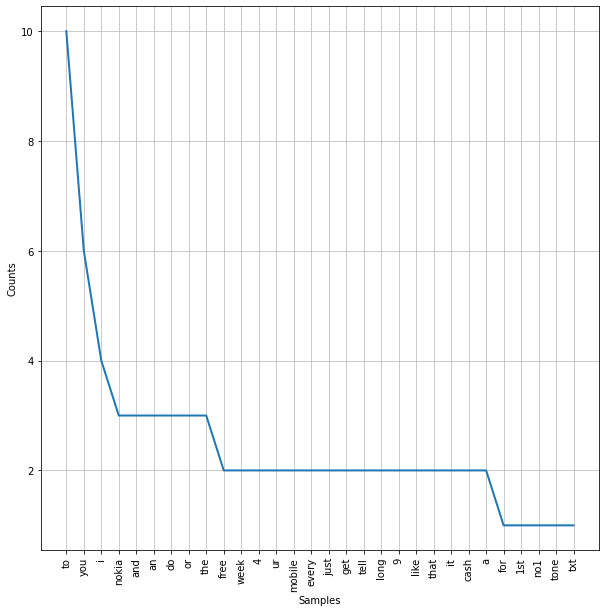

In [ ]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 10))
fdist.plot(30, cumulative=False)
plt.show()

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words("english"))
print(len(stop_words))
print(stop_words)

179
{'wouldn', 'an', 'in', 'doesn', 'my', 'here', 'hadn', 'again', "haven't", "didn't", 'be', 'each', 'so', 'm', 'while', "won't", 'yours', 'having', 'has', 'most', 'didn', 'such', 'same', 'as', 'll', 'yourself', 'only', 'down', 'i', 'under', 'a', 'haven', 't', 'but', 'wasn', "you're", 's', "hadn't", 'their', 'off', 'am', 'did', 'all', 'hers', "you'd", 'below', 'been', 'both', "couldn't", 'itself', 'very', 'which', 'do', 'themselves', "don't", 'weren', 'being', 'it', 'theirs', 'your', 'own', 'about', 're', 'ain', 'few', 'himself', 'at', 'up', 'this', 'mustn', "she's", 'don', 'had', "aren't", 'yourselves', 'once', 'if', "mustn't", 'out', 'over', 'y', "wasn't", 'doing', 'before', "weren't", 'his', "that'll", 'because', 'they', 'that', 'to', 'you', "mightn't", 'now', 'too', 'with', 'these', 'into', 'other', 'just', 'until', 'against', 'herself', 'whom', 'ours', 'than', 'couldn', 'its', 'on', 'from', 'needn', 'ourselves', 'o', 'me', 'for', 'when', 'why', "needn't", 'during', 'can', 'isn', 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ayuda\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
filtered_sent=[]
for w in tokenized_word:
    if w in stop_words:
        filtered_sent.append(w)

print("Tokenized Sentence:", tokenized_word)
print("Filterd Sentence:", filtered_sent)

Tokenized Sentence: ['free', 'for', '1st', 'week', 'no1', 'nokia', 'tone', '4', 'ur', 'mobile', 'every', 'week', 'just', 'txt', 'nokia', 'to', '8077', 'get', 'txting', 'and', 'tell', 'ur', 'mates', 'wwwgetzedcouk', 'pobox', '36504', 'w45wq', '16', 'norm150ptone', 'tyler', 'getting', 'an', '8th', 'has', 'to', 'leave', 'not', 'long', 'after', '9', 'can', 'you', 'get', 'here', 'in', 'like', 'an', 'hour', 'how', 'do', 'you', 'plan', 'to', 'manage', 'that', 'shop', 'till', 'u', 'drop', 'is', 'it', 'you', 'either', '10k', '5k', 'â500', 'cash', 'or', 'â100', 'travel', 'voucher', 'call', 'now', '09064011000', 'ntt', 'po', 'box', 'cr01327bt', 'fixedline', 'cost', '150ppm', 'mobile', 'vary', 'or', 'just', 'do', 'that', '6times', 'i', 'was', 'about', 'to', 'do', 'it', 'when', 'i', 'texted', 'i', 'finished', 'a', 'long', 'time', 'ago', 'and', 'showered', 'and', 'erything', 'o', 'ic', 'lol', 'should', 'play', '9', 'doors', 'sometime', 'yo', 'free', 'entry', 'to', 'the', 'gr8prizes', 'wkly', 'comp',

In [ ]:
new_stopwords = ["for", "free", "mates", "1st", "week", "no1", "every", "txt", "txting", "and", "ur", "tell", "long", "8077", "like" "just", "ntt", "cr01327bt", "150ppm", "wktxt", "ic", "get", "4", "16", "9", "drop"]
new_stopwords_list = stop_words.union(new_stopwords)
filtered_sent=[]

for w in tokenized_word:
    if w not in new_stopwords_list:
        filtered_sent.append(w)

print("Tokenized Sentence:", tokenized_word)
print("Filterd Sentence:", filtered_sent)

Tokenized Sentence: ['free', 'for', '1st', 'week', 'no1', 'nokia', 'tone', '4', 'ur', 'mobile', 'every', 'week', 'just', 'txt', 'nokia', 'to', '8077', 'get', 'txting', 'and', 'tell', 'ur', 'mates', 'wwwgetzedcouk', 'pobox', '36504', 'w45wq', '16', 'norm150ptone', 'tyler', 'getting', 'an', '8th', 'has', 'to', 'leave', 'not', 'long', 'after', '9', 'can', 'you', 'get', 'here', 'in', 'like', 'an', 'hour', 'how', 'do', 'you', 'plan', 'to', 'manage', 'that', 'shop', 'till', 'u', 'drop', 'is', 'it', 'you', 'either', '10k', '5k', 'â500', 'cash', 'or', 'â100', 'travel', 'voucher', 'call', 'now', '09064011000', 'ntt', 'po', 'box', 'cr01327bt', 'fixedline', 'cost', '150ppm', 'mobile', 'vary', 'or', 'just', 'do', 'that', '6times', 'i', 'was', 'about', 'to', 'do', 'it', 'when', 'i', 'texted', 'i', 'finished', 'a', 'long', 'time', 'ago', 'and', 'showered', 'and', 'erything', 'o', 'ic', 'lol', 'should', 'play', '9', 'doors', 'sometime', 'yo', 'free', 'entry', 'to', 'the', 'gr8prizes', 'wkly', 'comp',

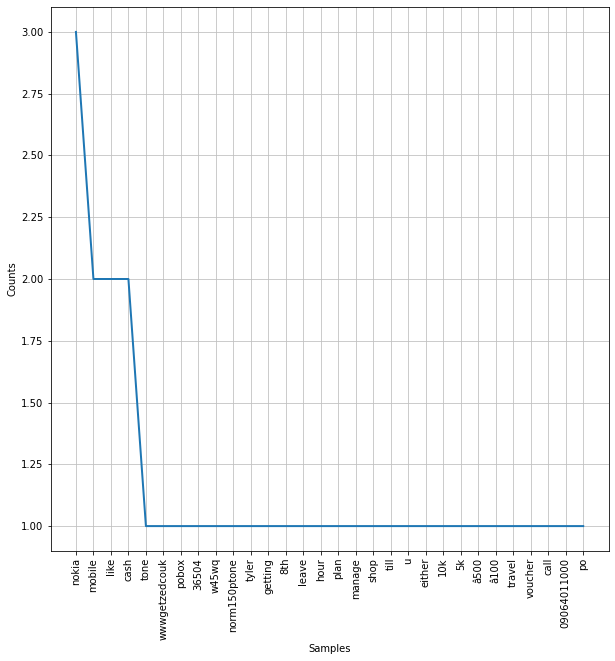

In [ ]:
from nltk.probability import FreqDist

fdist = FreqDist(filtered_sent)
plt.figure(figsize=(10, 10))
fdist.plot(30, cumulative=False)

plt.show()

In [ ]:
#3.	Text Mining for Classification with CountVectorizer()

sample_df["label"] = sample_df.label.map({"ham": 0, "spam": 1})

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

token = RegexpTokenizer(r'[a-zA-Z0-9]+')

In [ ]:
cv = CountVectorizer(lowercase=True, stop_words='english', ngram_range = (1,1), tokenizer = token.tokenize)
text_counts = cv.fit_transform(sample_df['message'])
print (text_counts)

  (0, 3215)	1
  (0, 394)	1
  (0, 8014)	2
  (0, 5201)	1
  (0, 5222)	2
  (0, 7503)	1
  (0, 567)	1
  (0, 7758)	2
  (0, 4932)	1
  (0, 4191)	1
  (0, 7648)	1
  (0, 754)	1
  (0, 7653)	1
  (0, 7290)	1
  (0, 4751)	1
  (0, 8245)	1
  (0, 5714)	1
  (0, 532)	1
  (0, 7912)	1
  (0, 363)	1
  (0, 5238)	1
  (1, 7658)	1
  (1, 3360)	1
  (1, 838)	1
  (1, 4406)	1
  :	:
  (4734, 4695)	1
  (4734, 6426)	1
  (4734, 5073)	1
  (4734, 4558)	1
  (4734, 4418)	1
  (4734, 6304)	1
  (4734, 6371)	2
  (4734, 3234)	1
  (4734, 2542)	1
  (4734, 7215)	1
  (4734, 3045)	1
  (4734, 6212)	1
  (4735, 8355)	1
  (4735, 1014)	1
  (4735, 7029)	1
  (4735, 2369)	1
  (4735, 2609)	1
  (4736, 6268)	1
  (4736, 4782)	1
  (4736, 4412)	1
  (4736, 4855)	1
  (4737, 4613)	1
  (4737, 1503)	1
  (4737, 2324)	1
  (4737, 3029)	1


In [ ]:
print (cv.vocabulary_)

{'free': 3215, '1st': 394, 'week': 8014, 'no1': 5201, 'nokia': 5222, 'tone': 7503, '4': 567, 'ur': 7758, 'mobile': 4932, 'just': 4191, 'txt': 7648, '8077': 754, 'txting': 7653, 'tell': 7290, 'mates': 4751, 'wwwgetzedcouk': 8245, 'pobox': 5714, '36504': 532, 'w45wq': 7912, '16': 363, 'norm150ptone': 5238, 'tyler': 7658, 'getting': 3360, '8th': 838, 'leave': 4406, 'long': 4545, '9': 840, 'like': 4462, 'hour': 3798, 'plan': 5676, 'manage': 4706, 'shop': 6606, 'till': 7432, 'u': 7664, 'drop': 2691, '10k': 286, '5k': 658, '500': 636, 'cash': 1840, '100': 270, 'travel': 7574, 'voucher': 7898, '09064011000': 217, 'ntt': 5277, 'po': 5712, 'box': 1595, 'cr01327bt': 2231, 'fixedline': 3108, 'cost': 2203, '150ppm': 350, 'vary': 7820, '6times': 708, 'texted': 7326, 'finished': 3091, 'time': 7433, 'ago': 999, 'showered': 6628, 'erything': 2863, 'o': 5304, 'ic': 3879, 'lol': 4540, 'play': 5684, 'doors': 2639, 'yo': 8355, 'entry': 2844, 'gr8prizes': 3463, 'wkly': 8130, 'comp': 2105, 'chance': 1888, '

In [ ]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(text_counts, sample_df['label'], test_size = 0.3, random_state=1)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

clf = MultinomialNB().fit(train_x, train_y)
predicted= clf.predict(test_x)
print("MultinomialNB Accuracy:", metrics.accuracy_score(predicted, test_y))

MultinomialNB Accuracy: 0.980309423347398


In [ ]:
#4.	Text Mining for Classification with TfidfVectorizer

from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(stop_words='english')
text_tf = tf.fit_transform(sample_df['message'])
print (text_tf)

  (0, 5210)	0.24076537687554053
  (0, 346)	0.18189155319953595
  (0, 7882)	0.24076537687554053
  (0, 506)	0.24076537687554053
  (0, 5685)	0.21428968101146903
  (0, 8218)	0.23271663267767498
  (0, 4724)	0.21856623619762106
  (0, 7260)	0.1516841314879053
  (0, 7625)	0.2262898345553749
  (0, 714)	0.26790143820041096
  (0, 7620)	0.14670674767679995
  (0, 4167)	0.11977932937107075
  (0, 4906)	0.1528383677633345
  (0, 7729)	0.24733896034844063
  (0, 7475)	0.1874408556044888
  (0, 5194)	0.3609358296348665
  (0, 5173)	0.23271663267767498
  (0, 7984)	0.32011686935782946
  (0, 373)	0.19524324020165074
  (0, 3185)	0.13641965432444625
  (1, 3768)	0.3680951164586827
  (1, 4436)	0.2589668891089219
  (1, 4518)	0.35536133008646004
  (1, 4380)	0.33955749173992666
  (1, 798)	0.46581677709115593
  :	:
  (4734, 6182)	0.33628998569072893
  (4734, 3014)	0.33628998569072893
  (4734, 7185)	0.33628998569072893
  (4734, 2512)	0.33628998569072893
  (4734, 3204)	0.26451835957052866
  (4734, 6341)	0.40328941338343

In [ ]:
print (tf.vocabulary_)

{'free': 3185, '1st': 373, 'week': 7984, 'no1': 5173, 'nokia': 5194, 'tone': 7475, 'ur': 7729, 'mobile': 4906, 'just': 4167, 'txt': 7620, '8077': 714, 'txting': 7625, 'tell': 7260, 'mates': 4724, 'wwwgetzedcouk': 8218, 'pobox': 5685, '36504': 506, 'w45wq': 7882, '16': 346, 'norm150ptone': 5210, 'tyler': 7630, 'getting': 3329, '8th': 798, 'leave': 4380, 'long': 4518, 'like': 4436, 'hour': 3768, 'plan': 5647, 'manage': 4679, 'shop': 6576, 'till': 7404, 'drop': 2662, '10k': 282, '5k': 624, 'â500': 8416, 'cash': 1809, 'â100': 8381, 'travel': 7546, 'voucher': 7869, '09064011000': 216, 'ntt': 5249, 'po': 5683, 'box': 1557, 'cr01327bt': 2202, 'fixedline': 3077, 'cost': 2172, '150ppm': 335, 'vary': 7791, '6times': 672, 'texted': 7296, 'finished': 3060, 'time': 7405, 'ago': 959, 'showered': 6598, 'erything': 2833, 'ic': 3849, 'lol': 4513, 'play': 5655, 'doors': 2610, 'yo': 8326, 'entry': 2814, 'gr8prizes': 3432, 'wkly': 8103, 'comp': 2074, 'chance': 1857, 'win': 8065, 'latest': 4350, '8800': 76

In [ ]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(text_tf, sample_df['label'], test_size=0.3, random_state=123)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

clf = MultinomialNB().fit(train_x, train_y)
predicted= clf.predict(test_x)
print("MultinomialNB Accuracy:", metrics.accuracy_score(predicted, test_y))

MultinomialNB Accuracy: 0.9542897327707455


In [ ]:
#5.	K-Means Clustering of TfidfVectorizer Text

from sklearn.cluster import KMeans

km = KMeans(n_clusters = 2)
km.fit(text_tf)

KMeans(n_clusters=2)

In [ ]:
clusters = km.predict(text_tf)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

In [ ]:
two_dim = pca.fit_transform(text_tf.todense())

C:\Users\ayuda\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [ ]:
scatter_x = two_dim[:, 0] # first principle component
scatter_y = two_dim[:, 1] # second principle component

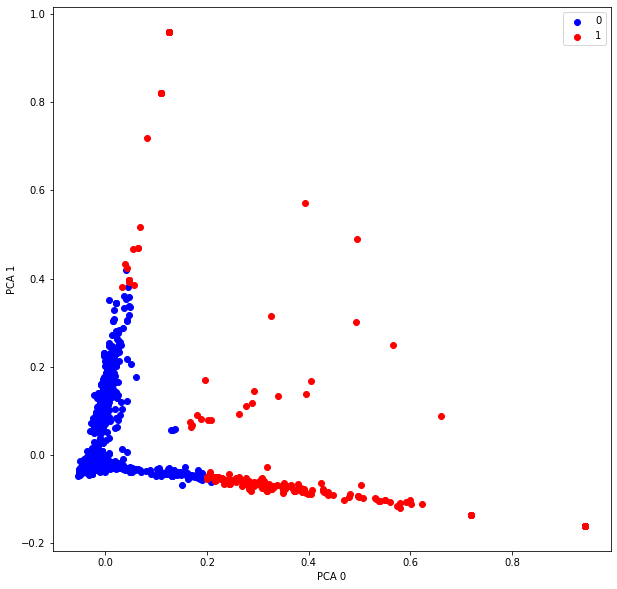

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(10,10)
cmap = {0: 'blue', 1: 'red'}
for group in np.unique(clusters):
    ix = np.where(clusters == group)
    ax.scatter(scatter_x[ix], scatter_y[ix], c=cmap[group], label=group)
ax.legend()

plt.xlabel("PCA 0")
plt.ylabel("PCA 1")
plt.show()

In [ ]:
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = tf.get_feature_names_out()

for i in range(2):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()

Cluster 0: im just ur come dont ltgt good know time got
Cluster 1: ok later ill sorry lor meeting thanx im come ã¼


In [ ]:
#6.	Word Clouds Analysis

df = pd.read_csv(r"Freedom from Fear.csv")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from os import path
from wordcloud import WordCloud

In [ ]:
text = " ".join(speech for speech in df.speech)

In [ ]:
wordcloud = WordCloud(background_color='Purple', width=3500, height=2500).generate(text)

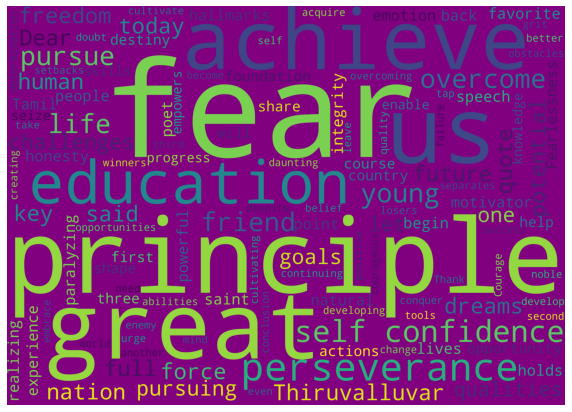

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
wordcloud.to_file("Freedom from Fear-wordcloud.png")

In [ ]:
from PIL import Image

cat = np.array(Image.open("cat.png"))
cat

array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ...,

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255

In [ ]:
def transform_format(val):
    return np.where(val == 255, 255, 0)

In [ ]:
transformed_cat = np.apply_along_axis(transform_format, 2, cat)

In [ ]:
import nltk
nltk.download('stopwords')
from wordcloud import WordCloud
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
new_stopwords = ['us', 'help', 'full', 'fear', 'great', 'three', 'begin', 'another', 'poet', 'let', 'said', 'share', 'would', 'today', 'Dear', 'take', 'become', 'despite']
new_stopwords_list = stop_words.union(new_stopwords)
print(new_stopwords_list)

{'our', 'myself', 'were', "you'd", 'doing', 'its', 'those', 'but', 'be', "wouldn't", 'become', 'needn', "you're", 'themselves', 'when', 'should', "won't", 'being', "wasn't", "hadn't", 'us', 'yourself', 'after', 'share', 'at', 'you', 'ourselves', 'too', 'Dear', 'don', 'out', 'so', "doesn't", 'hadn', 'further', 'poet', 'and', 'just', 'during', 'can', 'theirs', 'about', "needn't", "weren't", 'before', 'o', 'haven', 've', 'under', 'had', 'most', 'same', 'today', 'into', 'fear', 'three', 'below', "couldn't", 'help', 'only', 'other', 'some', "haven't", 'begin', 'would', 'again', "didn't", 'few', 'through', 'him', 'having', 'while', 'in', "she's", 'her', 'they', 'of', 'mustn', 'are', 'have', 'then', 's', 'did', 'or', 'doesn', "you'll", 'if', 'he', 'do', 'by', 'yours', 'hasn', 'what', 'mightn', "isn't", "aren't", 'me', 'them', 'my', 'over', 'own', 'ours', 'isn', 'ma', 'herself', 'down', "shouldn't", 'both', 'd', 'i', 'there', "mustn't", 'take', 'each', 'does', 'more', 'now', 'another', 'their'

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ayuda\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
wc = WordCloud(background_color="white", mask=transformed_cat, width=2000, height=2000,
               stopwords=new_stopwords_list, contour_width=2, contour_color="firebrick")

# Generate a wordcloud on text
wc.generate(text)

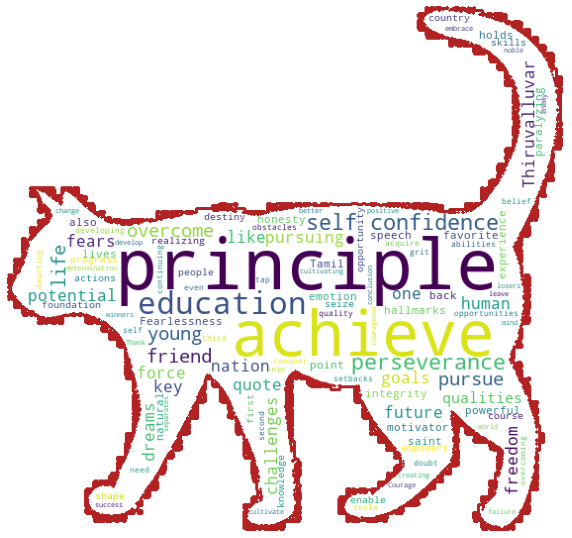

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [ ]:
wc.to_file("Freedom from Fear-wordcloud-cat.png")